In [1]:
import pandas as pd
D1=pd.read_csv('diabetes.csv')

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [2]:
D1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
D1.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
D1.shape

(768, 9)

In [6]:
D1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
D1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
zero_not_accepted=["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [13]:
for column in zero_not_accepted:
    D1[column]=D1[column].replace(0, np.nan)

In [14]:
imputer = SimpleImputer(strategy="mean")
D1[zero_not_accepted] = imputer.fit_transform(D1[zero_not_accepted])

In [15]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [16]:
for col in zero_not_accepted:
    D1 = remove_outliers_iqr(D1, col)


In [31]:
from scipy import stats
zscore=np.abs(stats.zscore(D1))
print(zscore)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.493573  0.927469       0.054956       1.148892  0.303739  0.306068   
1       0.946985  1.293413       0.620161       0.039375  0.303739  0.876993   
2       1.069796  2.161292       0.808563       0.067745  0.303739  1.434722   
3       0.946985  1.152405       0.620161       1.070142  3.143400  0.623480   
4       1.235096  0.539696       3.069385       1.148892  1.001127  1.911652   
..           ...       ...            ...            ...       ...       ...   
762     1.357907  1.152405       0.996965       0.067745  0.303739  1.569929   
764     0.658873  0.010914       0.243357       0.330464  0.303739  0.846896   
765     0.205461  0.024338       0.054956       1.070142  2.135272  0.944597   
766     0.946985  0.151922       1.185366       0.067745  0.303739  0.285463   
767     0.946985  1.011397       0.243357       0.409214  0.303739  0.234760   

     DiabetesPedigreeFunction       Age

In [18]:
X = D1.drop("Outcome", axis=1)
y = D1["Outcome"]

In [33]:
features=X.columns.values
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X=pd.DataFrame(scaler.transform(X))
X.columns=features

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Outcome')], axis=1)

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

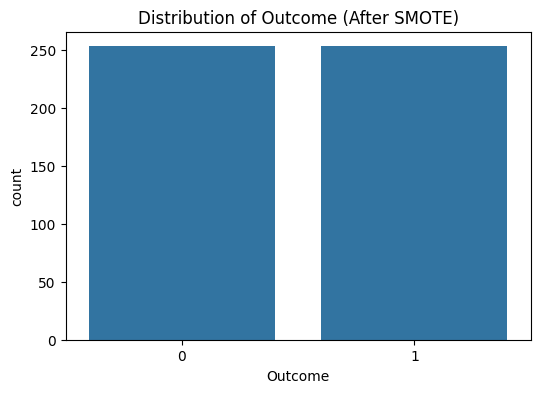

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df_resampled)
plt.title('Distribution of Outcome (After SMOTE)')
plt.show()

In [39]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_resampled, y_resampled)

GradientBoostingClassifier(random_state=42)

In [40]:
y_pred = model.predict(X_test)

In [42]:
print(y_pred)

[0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1]


In [43]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred)

0.7878787878787878

In [44]:
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred))

0.6888888888888889


In [45]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.746987951807229


In [47]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.10310612597066415


<Axes: >

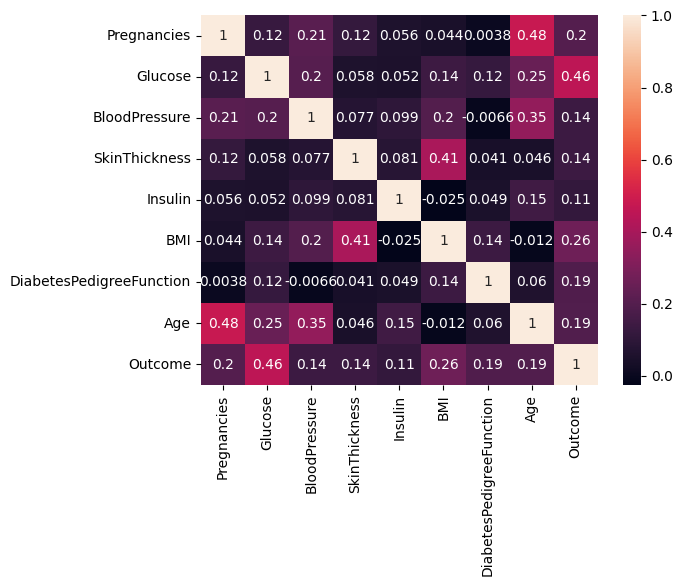

In [48]:
H=D1.corr()
sns.heatmap(H,annot=True)

In [49]:
H

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.124257,0.213562,0.116079,0.055508,0.044378,0.003845,0.477851,0.201917
Glucose,0.124257,1.000000,0.204943,0.058106,0.052343,0.141778,0.122559,0.248565,0.455058
BloodPressure,0.213562,0.204943,1.000000,0.076551,0.098874,0.197933,-0.006590,0.351645,0.136515
SkinThickness,0.116079,0.058106,0.076551,1.000000,0.081295,0.405430,0.041288,0.045648,0.137388
Insulin,0.055508,0.052343,0.098874,0.081295,1.000000,-0.025313,0.048887,0.147345,0.112743
BMI,0.044378,0.141778,0.197933,0.405430,-0.025313,1.000000,0.136216,-0.012025,0.263510
DiabetesPedigreeFunction,0.003845,0.122559,-0.006590,0.041288,0.048887,0.136216,1.000000,0.060360,0.189074
Age,0.477851,0.248565,0.351645,0.045648,0.147345,-0.012025,0.060360,1.000000,0.191216
Outcome,0.201917,0.455058,0.136515,0.137388,0.112743,0.263510,0.189074,0.191216,1.000000


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        61
           1       0.69      0.82      0.75        38

    accuracy                           0.79        99
   macro avg       0.78      0.79      0.78        99
weighted avg       0.80      0.79      0.79        99



In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[47, 14],
       [ 7, 31]])

<Axes: >

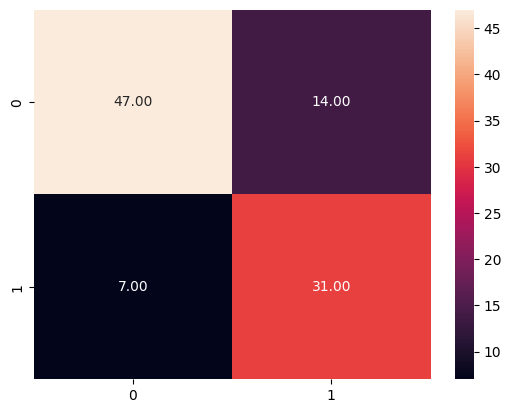

In [53]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt=".2f")

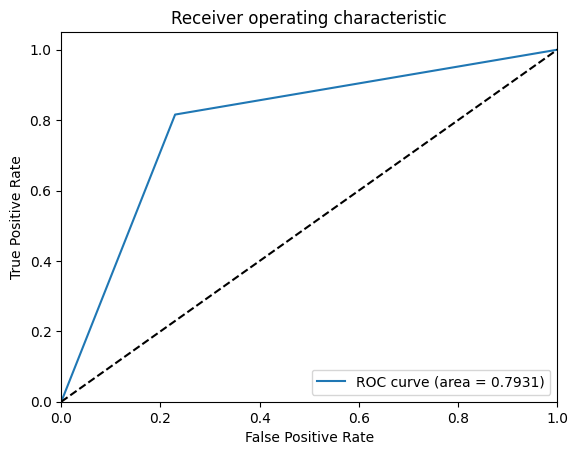

In [56]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %.4f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()


<Axes: >

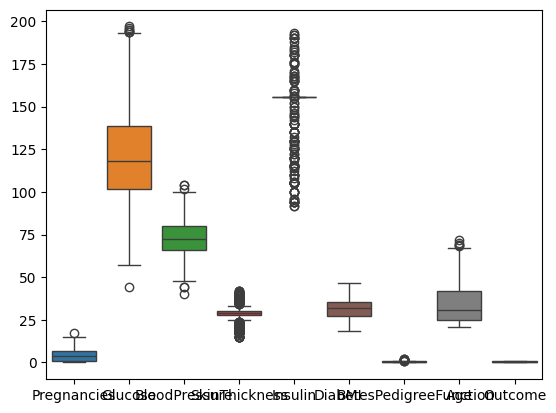

In [57]:
sns.boxplot(D1)